In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#00A321","#5C3993", "#E28413", '#A31621', "#009FFD", '#F551A8', '#0F9E7A']))

In [3]:
exp_name = 'exp17B'
results_dir = '/home/emma/Documents/BC_Sim/results/' + exp_name + '/'

#import each set of results
dMR_df = pd.read_csv(results_dir + 'dMR.csv', index_col=0)
MR_ratio_df = pd.read_csv(results_dir + 'MR_ratio.csv', index_col=0)
dSEI_df = pd.read_csv(results_dir + 'dSEI.csv', index_col=0)
pc_dSEI_df = pd.read_csv(results_dir + 'pc_dSEI.csv', index_col=0)
dSEI_med_df = pd.read_csv(results_dir + 'dSEI_med.csv', index_col=0)
pc_dSEI_med_df = pd.read_csv(results_dir + 'pc_dSEI_med.csv', index_col=0)

In [4]:
dMR_df

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,n_sim
0.00,94.505526,94.991306,95.925764,93.248306,92.711555,95.647989,93.575025,3543069911
0.05,99.580297,99.316595,96.910663,98.280031,97.919932,97.999774,98.960462,3543069911
0.10,100.916905,103.082464,102.849440,101.228134,103.471305,102.541879,100.929500,3543069911
0.15,107.689469,106.798852,104.352848,103.915411,107.611293,105.334557,104.229009,3543069911
0.20,109.962045,109.887206,108.060430,109.717156,107.845860,107.340113,108.197727,3543069911
...,...,...,...,...,...,...,...,...
0.10,101.023721,102.004211,103.304302,103.897445,101.577859,101.046706,100.978469,683688611
0.15,105.959476,106.795989,104.785842,106.966941,108.793048,102.460168,103.934389,683688611
0.20,110.649173,108.145194,110.932973,108.488883,110.002334,111.393642,109.629254,683688611
0.25,112.659121,112.162862,112.844670,112.037316,112.749400,111.334786,111.421600,683688611


In [5]:
MR_ratio_df

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,n_sim
0.00,3.541104,3.489365,3.538834,3.482300,3.406480,3.476008,3.440630,3543069911
0.05,3.731706,3.661514,3.557772,3.583919,3.564322,3.608254,3.599566,3543069911
0.10,3.648226,3.751341,3.734648,3.621852,3.709751,3.742177,3.594545,3543069911
0.15,3.927410,3.912985,3.782653,3.683825,3.821310,3.743294,3.696816,3543069911
0.20,3.967104,3.981323,3.796990,3.901302,3.831029,3.747796,3.788791,3543069911
...,...,...,...,...,...,...,...,...
0.10,3.689727,3.702480,3.727446,3.770378,3.630084,3.656837,3.596276,683688611
0.15,3.797485,3.844295,3.705840,3.814278,3.975481,3.623123,3.666235,683688611
0.20,3.974329,3.860111,3.945241,3.779482,3.888702,3.907823,3.892210,683688611
0.25,4.001804,3.939554,4.026217,3.916621,3.900637,3.903618,3.802306,683688611


In [6]:
from scipy import stats
def simulation_confidence_intervals(df, simulation_column='n_sim', confidence=0.95):
    """
    calculate mean and 95% confidence intervals for each entry across simulations
    
    """
    # remove simulation column and group by index
    non_sim_columns = [col for col in df.columns if col != simulation_column]
    
    # calculate mean
    mean_df = df[non_sim_columns].groupby(level=0).mean()
    
    # calculate confidence intervals
    def calculate_ci(group):
        sem = group.sem()
        n = len(group)
        t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
        return t_value * sem
    
    # compute confidence intervals
    ci_values = df[non_sim_columns].groupby(level=0).apply(calculate_ci)
    
    # create lower and upper bound DataFrames
    lower_ci_df = mean_df - ci_values
    upper_ci_df = mean_df + ci_values

    return mean_df, lower_ci_df, upper_ci_df

In [7]:
#get average and CIs over simulations
mean_dMR_df, lower_ci_dMR_df, upper_ci_dMR_df = simulation_confidence_intervals(dMR_df)
mean_MR_ratio_df, lower_ci_MR_ratio_df, upper_ci_MR_ratio_df = simulation_confidence_intervals(MR_ratio_df)
mean_dSEI_df, lower_ci_dSEI_df, upper_ci_dSEI_df = simulation_confidence_intervals(dSEI_df)
mean_pc_dSEI_df, lower_ci_pc_dSEI_df, upper_ci_pc_dSEI_df = simulation_confidence_intervals(pc_dSEI_df)
mean_dSEI_med_df, lower_ci_dSEI_med_df, upper_ci_dSEI_med_df = simulation_confidence_intervals(dSEI_med_df)
mean_pc_dSEI_med_df, lower_ci_pc_dSEI_med_df, upper_ci_pc_dSEI_med_df = simulation_confidence_intervals(pc_dSEI_med_df)

In [8]:
def plt_dMR_heatmap(df, save=False):
    sns.heatmap(df.iloc[::-1].astype(float), annot=True, fmt ='.1f', cmap='Reds')
    plt.ylabel(u'AI System ΔTPR')
    plt.xlabel(u'AI System ΔFPR')
    plt.title('Average Mortality Rate Disparity (per 100k)')
    if save:
        plt.savefig(results_dir + 'deltaMR.png', dpi=800)
        plt.savefig(results_dir + 'deltaMR.svg')
    plt.show()

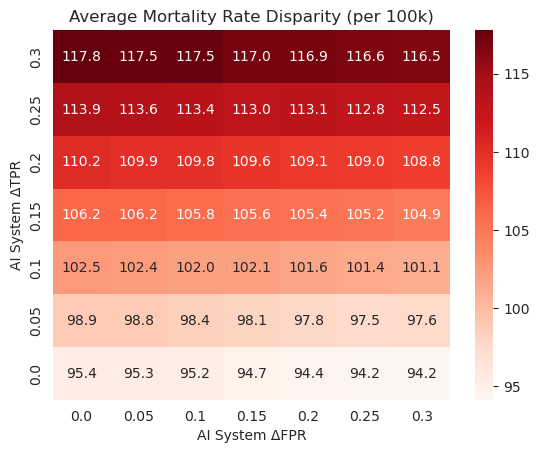

In [9]:
plt_dMR_heatmap(mean_dMR_df)

In [10]:
def plt_MR_ratio_heatmap(df, save=False):
    sns.heatmap(df.iloc[::-1].astype(float), annot=True, fmt ='.2f', cmap='Reds')
    plt.ylabel(u'AI System ΔTPR')
    plt.xlabel(u'AI System ΔFPR')
    plt.title('Average Mortality Rate Ratio (Unprivileged/Privileged)')
    if save:
        plt.savefig(results_dir + 'MR_ratio.png', dpi=800)
        plt.savefig(results_dir + 'MR_ratio.svg')
    plt.show()

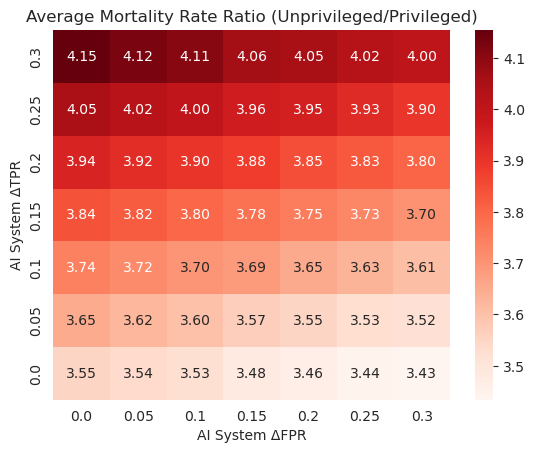

In [11]:
plt_MR_ratio_heatmap(mean_MR_ratio_df)

In [12]:
def plt_dSEI_heatmap(df, save=False):
    sns.heatmap(df.iloc[::-1].astype(float), annot=True, fmt ='.3f', cmap='Oranges')
    plt.ylabel(u'AI System ΔTPR')
    plt.xlabel(u'AI System ΔFPR')
    plt.title('Average Inter-Group SEI Disparity')
    if save:
        plt.savefig(results_dir + 'dSEI.png', dpi=800)
        plt.savefig(results_dir + 'dSEI.svg')
    plt.show()

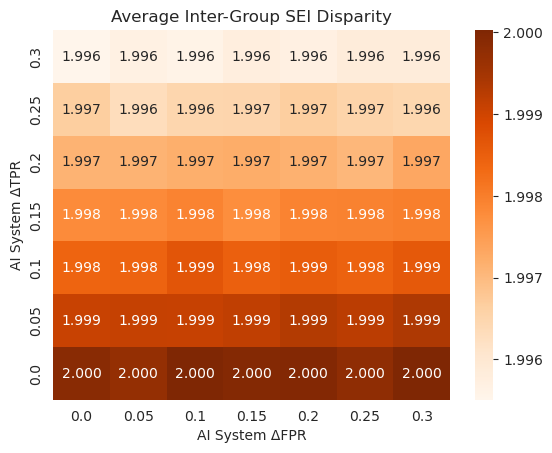

In [13]:
plt_dSEI_heatmap(mean_dSEI_df)

In [14]:
def plt_pc_dSEI_heatmap(df, save=False):
    sns.heatmap(df.iloc[::-1].astype(float), annot=True, fmt ='.3f', cmap='Oranges')
    plt.ylabel(u'AI System ΔTPR')
    plt.xlabel(u'AI System ΔFPR')
    plt.title('Average % Change in Inter-Group SEI Disparity')
    if save:
        plt.savefig(results_dir + 'pc_dSEI.png', dpi=800)
        plt.savefig(results_dir + 'PC_dSEI.svg')
    plt.show()

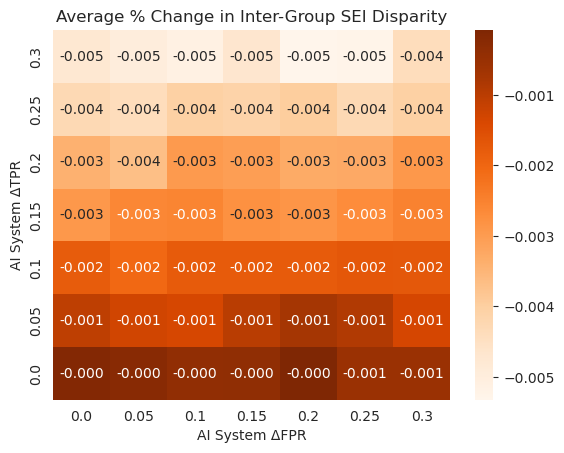

In [15]:
plt_pc_dSEI_heatmap(mean_pc_dSEI_df)